## Import required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm

%matplotlib inline

C:\Users\rushi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Operation on Train Data

read training data and print head of it

In [5]:
train_data = pd.read_csv('train.csv')

In [6]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
#find shape of training data
train_data.shape

(891, 12)

In [8]:
#check info of training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#check columns in training data
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# find total number of null values in each columns in training data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Drop columns which is less correlated with required output also which is having more null values
train_data.drop(['PassengerId','Name','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [12]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,NaN,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


In [13]:
# replace null values by mean of that columns
train_data.Age = train_data.Age.fillna(train_data.Age.mean())

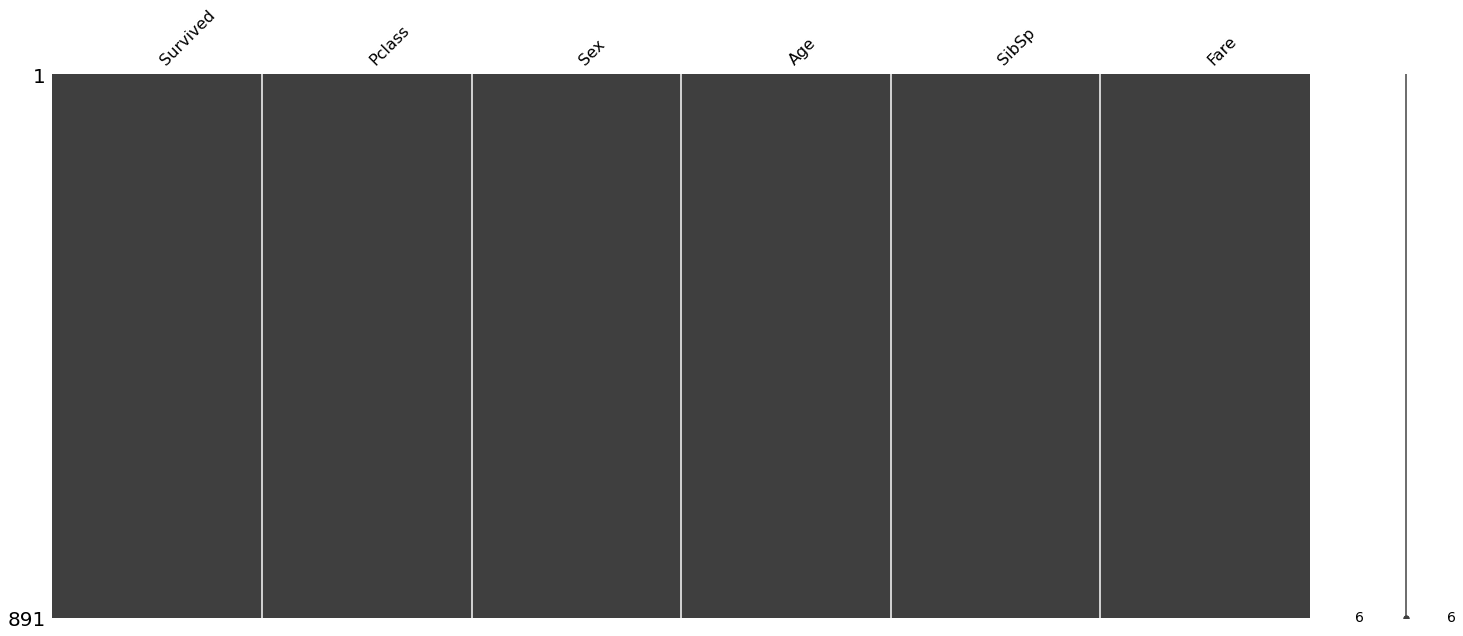

In [14]:
#import missingno library and plot null values
import missingno as mn
mn.matrix(train_data)

In [15]:

train_data.corr()

,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.159651
Fare,0.257307,-0.549500,0.091566,0.159651,1.000000


In [16]:
train_data.drop(['Pclass'],axis=1,inplace=True)

In [17]:
train_data.head()

,Survived,Sex,Age,SibSp,Fare
0,0,male,22.0,1,7.2500
1,1,female,38.0,1,71.2833
2,1,female,26.0,0,7.9250
3,1,female,35.0,1,53.1000
4,0,male,35.0,0,8.0500


In [18]:
sex_split = pd.get_dummies(train_data.Sex)
train_data = pd.concat([train_data,sex_split],axis=1)

In [19]:
train_data.drop(['Sex','female'],axis=1,inplace=True)
train_data.head()

,Survived,Age,SibSp,Fare,male
0,0,22.0,1,7.2500,1
1,1,38.0,1,71.2833,0
2,1,26.0,0,7.9250,0
3,1,35.0,1,53.1000,0
4,0,35.0,0,8.0500,1


In [20]:
train_data=train_data.rename(columns={'male':'Sex'})

In [21]:
train_data.head()

,Survived,Age,SibSp,Fare,Sex
0,0,22.0,1,7.2500,1
1,1,38.0,1,71.2833,0
2,1,26.0,0,7.9250,0
3,1,35.0,1,53.1000,0
4,0,35.0,0,8.0500,1


In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [24]:
Sclar = StandardScaler()

In [25]:
Sclar.fit(train_data[['Fare']])
Sclar.fit(train_data[['Age']])

StandardScaler()

In [433]:
train_data['Fare']=Sclar.transform(train_data[['Fare']])
train_data['Age']=Sclar.transform(train_data[['Age']])

In [434]:
train_data.head()

,Survived,Age,SibSp,Fare,Sex
0,0,0.271174,1,0.085826,1
1,1,0.472229,1,0.890466,0
2,1,0.321438,0,0.094308,0
3,1,0.434531,1,0.661975,0
4,0,0.434531,0,0.095878,1


## Operation on Test data

In [435]:
test_data = pd.read_csv('test.csv')

In [436]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [437]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [438]:
test_data.drop(['Name','Pclass','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [439]:
test_data.head()

,PassengerId,Sex,Age,SibSp,Fare
0,892,male,34.5,0,7.8292
1,893,female,47.0,1,7.0000
2,894,male,62.0,0,9.6875
3,895,male,27.0,0,8.6625
4,896,female,22.0,1,12.2875


In [440]:
test_data.Age = test_data.Age.fillna(test_data.Age.mean())

In [441]:
test_data.isnull().sum()

PassengerId    0
Sex            0
Age            0
SibSp          0
Fare           1
dtype: int64

In [442]:
test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean())

In [443]:
Sclar.fit(test_data[['Fare']])
test_data['Fare']  = Sclar.transform(test_data[['Fare']])

Sclar.fit(test_data[['Age']])
test_data['Age']  = Sclar.transform(test_data[['Age']])

In [444]:
test_data.head()

,PassengerId,Sex,Age,SibSp,Fare
0,892,male,0.452723,0,0.015282
1,893,female,0.617566,1,0.013663
2,894,male,0.815377,0,0.018909
3,895,male,0.353818,0,0.016908
4,896,female,0.287881,1,0.023984


In [445]:
sex_splt = pd.get_dummies(test_data['Sex'])

In [446]:
test_data = pd.concat([test_data,sex_splt],axis=1)

In [447]:
test_data.drop(['Sex','female'],axis=1,inplace=True)

In [448]:
test_data = test_data.rename(columns={'male':'Sex'})

## Now Build model

In [449]:
train_data.head()

,Survived,Age,SibSp,Fare,Sex
0,0,0.271174,1,0.085826,1
1,1,0.472229,1,0.890466,0
2,1,0.321438,0,0.094308,0
3,1,0.434531,1,0.661975,0
4,0,0.434531,0,0.095878,1


In [450]:
demo = test_data.drop(['PassengerId'],axis=1)

In [451]:
demo.head()

,Age,SibSp,Fare,Sex
0,0.452723,0,0.015282,1
1,0.617566,1,0.013663,0
2,0.815377,0,0.018909,1
3,0.353818,0,0.016908,1
4,0.287881,1,0.023984,0


In [452]:
test_data

,PassengerId,Age,SibSp,Fare,Sex
0,892,0.452723,0,0.015282,1
1,893,0.617566,1,0.013663,0
2,894,0.815377,0,0.018909,1
3,895,0.353818,0,0.016908,1
4,896,0.287881,1,0.023984,0
...,...,...,...,...,...
413,1305,0.396975,0,0.015713,1
414,1306,0.512066,0,0.212559,0
415,1307,0.505473,0,0.014151,1
416,1308,0.396975,0,0.015713,1


In [453]:
test_data.head()

,PassengerId,Age,SibSp,Fare,Sex
0,892,0.452723,0,0.015282,1
1,893,0.617566,1,0.013663,0
2,894,0.815377,0,0.018909,1
3,895,0.353818,0,0.016908,1
4,896,0.287881,1,0.023984,0


In [454]:
X =  train_data.drop(['Survived'],axis=1)
X.head()

,Age,SibSp,Fare,Sex
0,0.271174,1,0.085826,1
1,0.472229,1,0.890466,0
2,0.321438,0,0.094308,0
3,0.434531,1,0.661975,0
4,0.434531,0,0.095878,1


In [455]:
y = train_data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [456]:
model = svm.SVC(C=100, kernel='rbf') 

In [457]:
model.fit(X,y)

SVC(C=100)

In [458]:
Y_predict = model.predict(demo)

In [459]:
Y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [460]:
submission = pd.DataFrame({
    'PassengerId':test_data['PassengerId'],
    'Survived':Y_predict
})

In [461]:
submission.to_csv('titanic_submition_2.csv',index=False)